In [1]:
import polars as pl

In [77]:
# read excel file with path: data/GratiMDL.xlsx
df = pl.read_excel("data/GratiMDL.xlsx", sheet_name="DDCL(DHI-PP) 2020-10-21",
                   read_options={"skip_rows": 4})
df = df[:, [2, 4, 6, 7]]
df.columns = ["Document No", "Title", "FA", "FC"]

# datetime NTP = 27/12/2016
NTP = pl.datetime(2016, 12, 27)
# calculate days from NTP to FA and FC
df = df.with_columns([
    (pl.col("FA") - NTP).dt.total_days().alias("NTP_to_FA"),
    (pl.col("FC") - NTP).dt.total_days().alias("NTP_to_FC")
])
df = df.with_columns([
    (pl.col("NTP_to_FC") - pl.col("NTP_to_FA")).alias("FA_to_FC")
])
# drop rows with FA_to_FC < 0
df = df.filter(pl.col("FA_to_FC") >= 0)
df

Document No,Title,FA,FC,NTP_to_FA,NTP_to_FC,FA_to_FC
str,str,date,date,i64,i64,i64
"""GRT-DA01-P0ZEN-020001""","""DOCUMENT IDENTIFICATION""",2017-01-10,2017-04-10,14,104,90
"""GRT-DA01-P0ZEN-020002""","""EQUIPMENT AND SYSTEM IDENTIFIC…",2017-01-10,2017-04-10,14,104,90
"""GRT-QM01-P0ZEN-040001""","""Shop Inspection and Test Plan …",2017-03-10,2017-06-10,73,165,92
"""GRT-QA00-P0H-040002""","""[HRSG]_NDE Procedure for HRSG …",2017-06-20,2017-09-20,175,267,92
"""GRT-QA00-P0H-040003""","""[HRSG]_NDE Procedure for HRSG …",2017-06-20,2017-09-20,175,267,92
…,…,…,…,…,…,…
"""GRT-YS02-P0PAC-165709""","""Instrument Interconnection Dia…",2020-08-29,2020-09-28,1341,1371,30
"""GRT-CA01-P0PAC-175182""","""Architectural Waste Disposal B…",2020-10-15,2020-11-14,1388,1418,30
"""GRT-CA01-P0PAC-175183""","""Toilet STG""",2020-10-13,2020-11-12,1386,1416,30


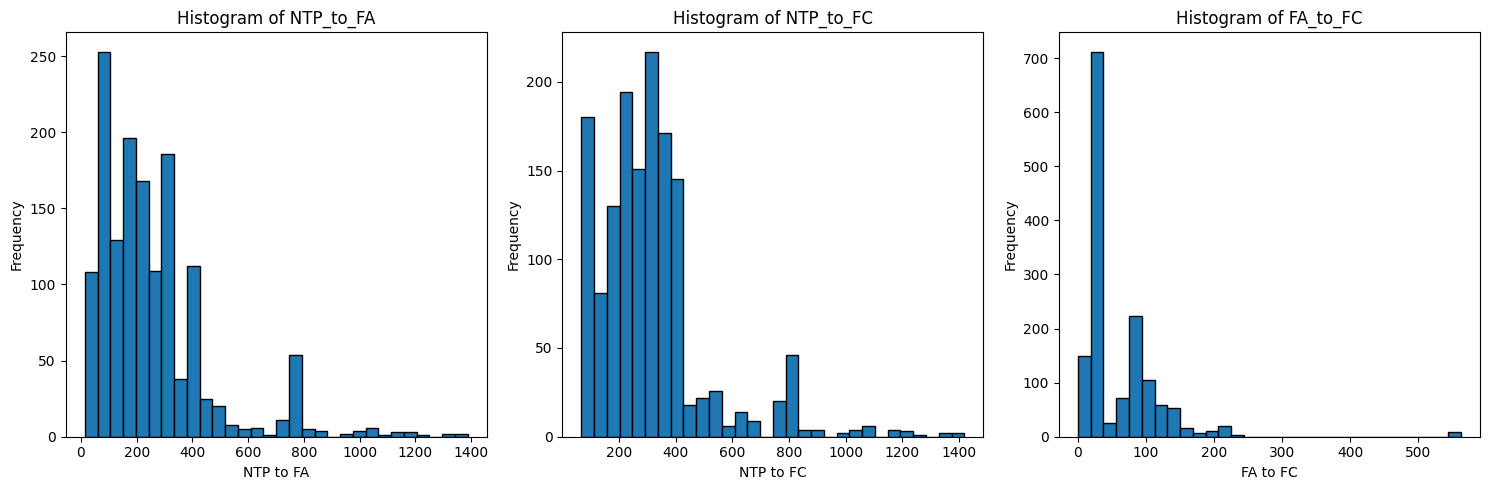

In [78]:
# show histogram of days_to_FA and days_to_FC and days_FA_to_FC
import matplotlib.pyplot as plt

fig, axes = plt.subplots(1, 3, figsize=(15, 5))

# Plot histogram for NTP_to_FA
axes[0].hist(df["NTP_to_FA"].to_numpy(), bins=30, edgecolor='black')
axes[0].set_title('Histogram of NTP_to_FA')
axes[0].set_xlabel('NTP to FA')
axes[0].set_ylabel('Frequency')

# Plot histogram for NTP_to_FC
axes[1].hist(df["NTP_to_FC"].to_numpy(), bins=30, edgecolor='black')
axes[1].set_title('Histogram of NTP_to_FC')
axes[1].set_xlabel('NTP to FC')
axes[1].set_ylabel('Frequency')

# Plot histogram for FA_to_FC
axes[2].hist(df["FA_to_FC"].to_numpy(), bins=30, edgecolor='black')
axes[2].set_title('Histogram of FA_to_FC')
axes[2].set_xlabel('FA to FC')
axes[2].set_ylabel('Frequency')

plt.tight_layout()
plt.show()

In [79]:
df.filter(pl.col("FA_to_FC") > 500)

Document No,Title,FA,FC,NTP_to_FA,NTP_to_FC,FA_to_FC
str,str,date,date,i64,i64,i64
"""GRT-UC08-P0ZEN-100002""","""General Arrangement of Power B…",2017-03-17,2018-10-01,80,643,563
"""GRT-UE00-P0ZEN-100003""","""General Arrangement of Steam T…",2017-03-17,2018-10-01,80,643,563
"""GRT-UE00-P0ZEN-100004""","""General Arrangement of Steam T…",2017-03-17,2018-10-01,80,643,563
"""GRT-UE00-P0ZEN-100005""","""General Arrangement of Steam T…",2017-03-17,2018-10-01,80,643,563
"""GRT-UE00-P0ZEN-100006""","""General Arrangement of Steam T…",2017-03-17,2018-10-01,80,643,563
"""GRT-UE00-P0ZEN-100007""","""General Arrangement of Steam T…",2017-03-17,2018-10-01,80,643,563
"""GRT-UE00-P0ZEN-100008""","""General Arrangement of Steam T…",2017-03-17,2018-10-01,80,643,563
"""GRT-UE00-P0ZEN-100009""","""General Arrangement of Steam T…",2017-03-17,2018-10-01,80,643,563
